# Why You (Almost) Can't Calculate Pi to a Billion Digits in Python at Home
## It is harder than you think
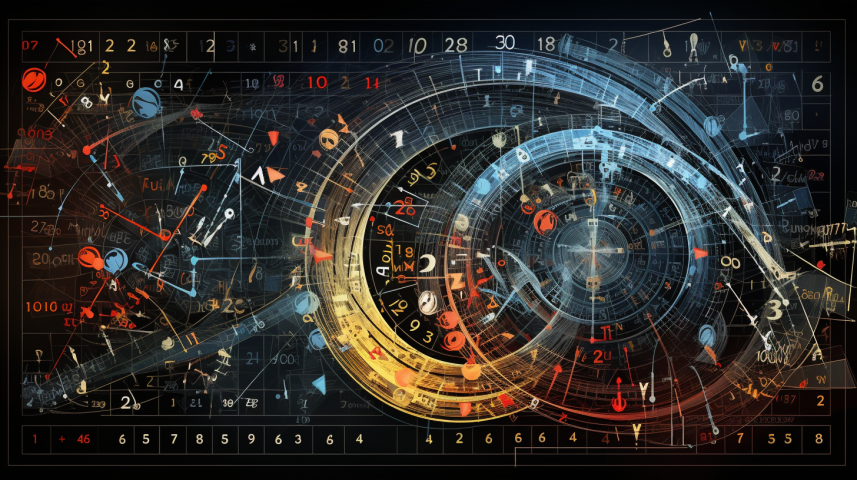

### Introduction

In June 9, 2022 Google set a new world record for calculating the most number of digits of Pi - 100 TRILLION! This monumental achievement was possible using the y-cruncher program running on Google Cloud. It crunched numbers for a whopping 157 days, 23 hours, 31 minutes and 7.651 seconds. 

This begs the question - since one billion is a hundred thousand times smaller than 100 trillion, calculating π to a billion digits should take that times shorter, right? - in other words, only about 136 seconds. 

But 136 seconds is too ambitious because your home PC will be much less powerful than Google Cloud's most formidable environments. So, how about a more reasonable runtime like 24-36 hours?

Turns out, calculating even a billion digits of Pi within 36 hours is a giant pipe dream. This article explains why with evidence in Python.

### First of all, what is wrong with `math.pi`?

In [13]:
import math

math.pi

3.141592653589793

`math.pi` has a precision of 15 digits. While it is not much, it is enough for the highest accuracy calculations in science.

For example, NASA's Jet Propulsion Laboratory (JPL) uses 15 digits of Pi for interplanetary navigation. To give you an idea, this level of precision is enough to calculate the circumference of a circle with a radius of 15 billion miles. The resulting 94 billion miles circumference would be off by no more than the width of your little finger. Think about that!

So, why even bother with a billion digits, let alone a hundred TRILLION?

Well, to give you the geek's answer: "Because it would be so freaking cool!".

### What if we increase the decimal precision?

Before we take out the big guns (the algorithms!), what if we increase decimal precision in Python when approximating π? That would be much simpler.

For the approximation, we will use Ramanujan's formula for π. Mathematicians all over the world use it to approximate π to an insurmountable extent. 

THE FORMULA to calculate pi as an image



In [14]:
from decimal import Decimal
from math import sqrt


def pi():
    return Decimal(9801) / (Decimal(1103) * Decimal(sqrt(8)))


pi()

Decimal('3.141592730013305445560728363')

We've got a precision of 16 using simple arithmetic. Let's increase it to 1000 digits and measure the runtime:

In [15]:
# Increase float precision to 1000
from decimal import getcontext

getcontext().prec = 1000

In [16]:
%%time

approximation = pi()

CPU times: user 14 µs, sys: 2 µs, total: 16 µs
Wall time: 16.2 µs


It took only a fraction of a second to get a 1000-point precision! Let's boldly increase the runtime to 1 million:

In [17]:
getcontext().prec = 1_000_000

In [18]:
%%time

approximation = pi()

CPU times: user 3.18 ms, sys: 0 ns, total: 3.18 ms
Wall time: 3.18 ms


Only three milliseconds - what's going on? Looks like we can easily calculate with a billion digit precision. Let's try that:

In [19]:
# One billion digit precision
getcontext().prec = 1_000_000_000

In [20]:
%%time

approximation = pi()

CPU times: user 3.04 s, sys: 301 ms, total: 3.34 s
Wall time: 3.32 s


Not even 10 seconds! `approximation` now holds a billion digits of Pi, calculated in only... waaait a second! We didn't compare the first few dozen digits to the verified digits of Pi to make sure the approximation is precise. 

So, let's check:

In [21]:
# I got this from the Internet
verified_pi = Decimal(3.1415926535897932384626433832795028841971)
rounded_pi = round(approximation, 50)

print(verified_pi)
print(rounded_pi)

3.141592653589793115997963468544185161590576171875
3.14159273001330544556072836229812077562268642913720


Well, looks like our approximation is only accurate till the 7th digit. What a disappointment!

### So, what just went wrong?

Why did we get a horrible result? Is Ramanujan's formula incorrect? Of course not! He was a genius. [G.H. Hardy](https://en.wikipedia.org/wiki/G._H._Hardy#:~:text=Hardy%20almost%20immediately%20recognised%20Ramanujan%27s,was%20the%20discovery%20of%20Ramanujan.) himself regarded his discovery of Ramanujan's talent as his best contribution to mathematics. 

The problem is with the way modern computers store floating point numbers and represent them. I won't go deep into this but refer you to [this Wikipedia page](https://en.wikipedia.org/wiki/Floating-point_arithmetic) and [this excellent StackOverflow thread](https://stackoverflow.com/questions/588004/is-floating-point-math-broken). 

Basically, we are facing a more complex version of the following conundrum:

In [6]:
0.1 + 0.1 + 0.1

0.30000000000000004

Due to limits in precision, errors like above can accumulate, especially for irrationals like Pi. Even a small rounding error can compound over multiple operations, completely changing the end result. 

This leads us to a realization - formulas that involve ratios and simple arithmetic won't be enough to calculate digits of Pi efficiently and correctly.

### The big guns

### Conclusion